STA365 HW 1


For HW1, below is my coding part. Before getting to the coding part, I would like to answer the questions in HW first. There are three questions listed in HW. (Q represents question; A represents answer)

1Q: How did you synthetically make your data?

1A: I synthetically create my data in 5 steps. Step 1 is to determine the probability of success; I Chose a success probability for each game. This should be a value between 0 and 1, where 0 means no chance of success and one means guaranteed success. Step 2 is to determine the sample size. I determined the number of trials or observations I wanted to simulate for each game. Step 3 is to generate the composite data. Step 4 is to organize data. I created numerous counting variables to store the number of trials for each game and the number of successes for each game. The last step is to verify geographical distribution. I insert some plots of the posterior distribution for each game to check whether my result matches the posterior distribution graphs.


2Q: What are your updates?

2A: The number of trials and the number of successes that had are the data that update the posterior. I did this step based on the beta-binomial and Bernoulli distribution. In the meantime, I also updated the parameters (alpha, beta) for beta distribution after each run.


3Q: Which one of the three choices will you try out? How will you choose?

3A: First, I established 3 beta distributions for each theta(for gameA,B,C) and run amount of times. Then, the highest theta means you need to choose that game. For example, suppose B is the highest in those three beta distributions. In that case, we should choose to play game B. After choosing the game, I established a Bernoulli distribution to see whether this game was a success or not. After these steps, I will update the data to the posterior distribution for each game.


Below is the coding part for this HW, and it includes some comments that could explain some of my code.
 

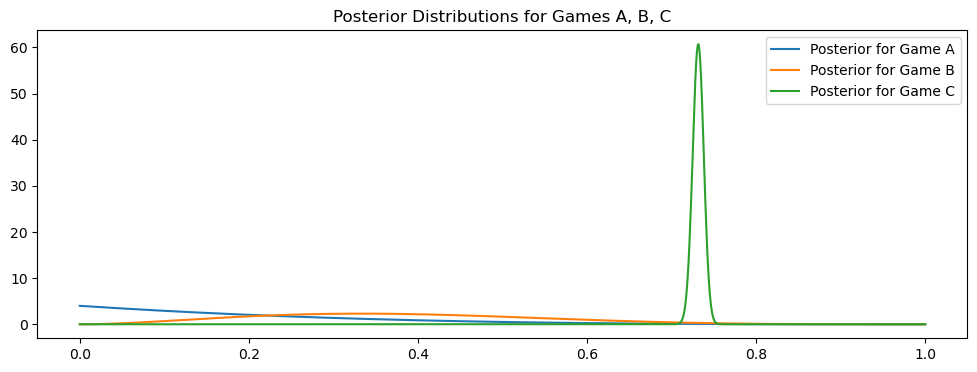

Game C is the best choice: 73.68421052631578


In [1]:
# Set up the probability of success (theta) for each game (game A, game B, game C) and Then, set up 3 beta distributions for each game (game A, game B, game C):

from scipy import stats
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
parameter_domain = np.linspace(0,1,1001)

# Set up thetas: probabilities of success for games A, B, and C
theta_a = 0.4
theta_b = 0.3
theta_c = 0.7

# Set up Bernoulli distributions for each game
a_bern = stats.bernoulli(p=theta_a)
b_bern = stats.bernoulli(p=theta_b)
c_bern = stats.bernoulli(p=theta_c)

# Set up beta distribution parameters for games A, B, and C
alpha, beta = 1, 1
para_a = {"a": alpha, "b": beta}
para_b = {"a": alpha, "b": beta}
para_c = {"a": alpha, "b": beta}

# Number of runs
num_run = 100

# Storage: the number of trials for each game (which is n)
num_a_trial = 0
num_b_trial = 0
num_c_trial = 0

# Storage: the number of successes for each game (which is x)
s_a = 0
s_b = 0
s_c = 0

# Generate random samples and choose the highest value for each run
for i in range(num_run):
    # Sample from Bernoulli distributions for each game
    a_bern_sample = a_bern.rvs(size=1)
    b_bern_sample = b_bern.rvs(size=1)
    c_bern_sample = c_bern.rvs(size=1)

    # Sample from beta distributions for each game
    beta_dis_a = stats.beta(a=para_a["a"], b=para_a["b"]).rvs(size=1)
    beta_dis_b = stats.beta(a=para_b["a"], b=para_b["b"]).rvs(size=1)
    beta_dis_c = stats.beta(a=para_c["a"], b=para_c["b"]).rvs(size=1)

    # Compare each beta value and find the one with the highest value, then store
    maxi_val = max(beta_dis_a[0], beta_dis_b[0], beta_dis_c[0])

    # For game A
    # For game A
    if beta_dis_a[0] == maxi_val:
        num_a_trial += 1
        # Choose this game
        # Insert Bernoulli's distribution to find whether success or not
        if a_bern_sample == 1:
            s_a += 1
        # The below steps are updated to the posterior
        para_a.update({"a": para_a["a"] + s_a, "b": para_a["b"] + (num_a_trial - s_a)})

    # For game B
    elif beta_dis_b[0] == maxi_val:
        num_b_trial += 1
        if b_bern_sample == 1:
            s_b += 1
        para_b.update({"a": para_b["a"] + s_b, "b": para_b["b"] + (num_b_trial - s_b)})

    # For game C
    elif beta_dis_c[0] == maxi_val:
        num_c_trial += 1
        if c_bern_sample == 1:
            s_c += 1
        para_c.update({"a": para_c["a"] + s_c, "b": para_c["b"] + (num_c_trial - s_c)})


posterior_a = stats.beta(a=para_a["a"], b=para_a["b"]).pdf(parameter_domain)
posterior_b = stats.beta(a=para_b["a"], b=para_b["b"]).pdf(parameter_domain)
posterior_c = stats.beta(a=para_c["a"], b=para_c["b"]).pdf(parameter_domain)

plt.figure(figsize=(12, 4))
plt.plot(parameter_domain, posterior_a, label="Posterior for Game A")
plt.plot(parameter_domain, posterior_b, label="Posterior for Game B")
plt.plot(parameter_domain, posterior_c, label="Posterior for Game C")
plt.legend()
plt.title("Posterior Distributions for Games A, B, C")
plt.show()

        
# Calculate success rates
result_a = (s_a / num_a_trial) * 100 if num_a_trial > 0 else 0
result_b = (s_b / num_b_trial) * 100 if num_b_trial > 0 else 0
result_c = (s_c / num_c_trial) * 100 if num_c_trial > 0 else 0

m_result = max(result_a, result_b, result_c)

if result_a == m_result:
    print("Game A is the best choice:", result_a)
elif result_b == m_result:
    print("Game B is the best choice:", result_b)
elif result_c == m_result:
    print("Game C is the best choice:", result_c)